# Power Spectral Density
"The PSD is a common plot in the field of signal processing. NumPy has many useful libraries for computing a PSD. Below we demo a few examples of how this can be accomplished and visualized with Matplotlib."

Import the libraries we will be using

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

Using a random number generated by np to plot. In the example they set the seed so that it is better reproducable

In [3]:
np.random.seed(19680801)

Setting up the base variables for plotting

In [4]:
dt = 0.01 # I'm not sure what this is yet
t = np.arange(0, 10, dt) # Builds a numpy array from 0-10 with a step of dt (I know what it is now)
nse = np.random.randn(len(t)) # Sets nse to a random number contained within the length of t
r = np.exp(-t / 0.05) # Again, not sure what this is for yet

Setting up variables/formulations for psd specific things

In [9]:
cnse = np.convolve(nse, r) * dt # Concolve is explained in the comment below
"""
Returns the discrete, linear convolution of two one-dimensional sequences.
The convolution operator is often seen in signal processing, where it models the effect of a linear time-invariant system on a signal. 
In probability theory, the sum of two independent random variables is distributed according to the convolution of their individual distributions.

Looks like:
array([ 1.04930431e-02,  1.72519688e-02,  1.96360634e-02, ...,
        2.79884071e-89, -3.42342142e-90,  1.87333092e-90])
"""
cnse = cnse[:len(t)] # Changes the array in some wierd psd way I guess ? I understand what matplot is doing later on so this isn't as important to understand
"""
array([ 1.04930431e-02,  1.72519688e-02,  1.96360634e-02,  3.33574269e-02,
        2.08178701e-02,  1.22600347e-02,  2.08165185e-02,  2.67312272e-02,
        1.37922298e-02, -1.08176832e-03,  1.77154884e-02,  1.14210228e-02,
        ... 8.53069000e-03,  3.60533467e-03,  4.06008472e-03])
"""
s = 0.1 * np.sin(2 * np.pi * t) + cnse # I suppose it was to make a variation on this variable, where you multiply it by the sine distribution of t, pi, and 2

Getting into plotting

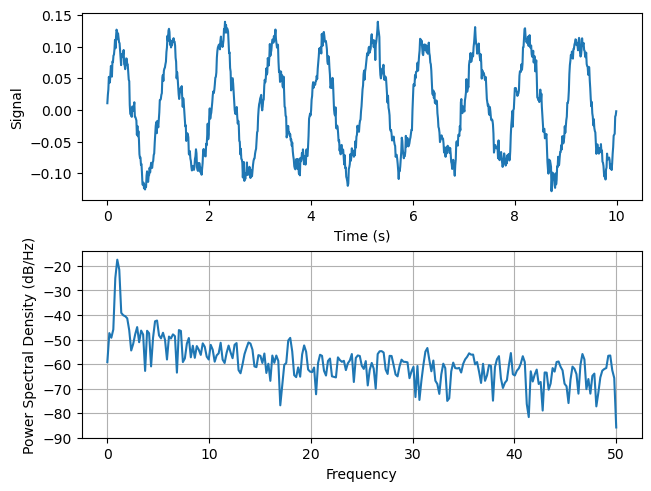

In [12]:
fig, (ax0, ax1) = plt.subplots(2, 1, layout='constrained') # Instantiating our plot(s), creates a figure and a set of subplots. fig = Figure, ax = different graphs
# Constrained is depreciated (?) but: Constrained layout automatically adjusts subplots so that decorations like tick labels, legends, and colorbars do not overlap, while still preserving the logical layout requested by the user
ax0.plot(t, s) # Plots the array example wave created earlier
ax0.set_xlabel("Time (s)") # Labels the x axis
ax0.set_ylabel("Signal") # Labels the y axis
ax1.psd(s, 512, 1 / dt) # Plots the actual PSD in a second graph

plt.show()

## Overall, pretty sick. Wanna learn more about different plots and oddly what psd is for now too